In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
HTML_MODE = True
if not HTML_MODE:
    %matplotlib widget
else:
    %matplotlib inline

### 週販レポート
# 標準ライブラリ
import os
import sys
from pathlib import Path
from datetime import datetime, timedelta

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
from gamedata import hard_sales as hs
from gamedata import plot_hard as ph
from gamedata import hard_info as hi
from gamedata import hard_event as he
from gamedata import chart_hard as ch
from gamedata import util as gu

# レポート日付
from report_config import get_config

config = get_config()
report_date = config["date"]
report_event_mask = he.EventMasks(hard=1.5, price=3, sale=2, soft=1.5, event=1)

def show_title(d:datetime) -> None:
    last_updated_str = d.strftime("%Y-%m-%d")
    mode = "[[LAB MODE]]" if not HTML_MODE else ""
    display(Markdown(f"# 国内ゲームハード週販レポート ({last_updated_str}) {mode}"))

show_title(report_date)

if not HTML_MODE:
    plt.show()


# 国内ゲームハード週販レポート (2026-01-04) 

* ハードウェアの販売データはファミ通の調査結果を基にしています。
* 一部のデータは処理上の都合により、週次値に調整しています。
* [過去の週販レポート](index.html)

## 直近4週間のハード売り上げ／累計推移

Switch2の2025年最終週は20万台でした｡今年5回目の20万台超えです｡
任天堂は12月をSwitch2大量出荷で完遂しました｡
今後は2026年に入ってからの出荷状況に注目です｡

Switchは微減の3.2万台｡世代交代が進んでいます｡

PS5は3週連続で約1万9千台です｡
このブレの無さは何なんでしょうか｡

In [3]:
df1 = hs.load_hard_sales()
(out1, style1) = ch.chart_units_by_date_hw(df1, begin=gu.weeks_before(report_date, 3), end=report_date)
display(style1)

## 週販推移

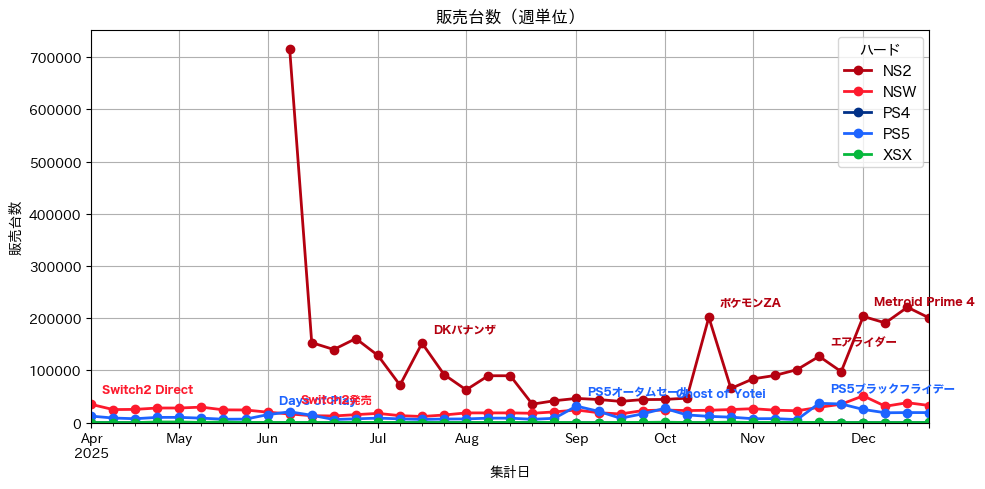

In [4]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, event_mask=he.EVENT_MASK_MIDDLE)

### 週販推移(拡大）

Switch2は年末商戦を大量出荷で締めくくりました｡
年始の1週目も同程度と予想しますが､その後は減少するでしょう｡

年始明けでSwitchは本格的に減少するでしょう｡
今までのSwitch週販最低記録は 2025/7/25の11,766台です｡2月あたりには4桁が見えてきそうです｡

PS5は不思議な低水準の安定が続いています｡
これがクリスマスシーズンだけなのか､2026年も続くのか注目です｡

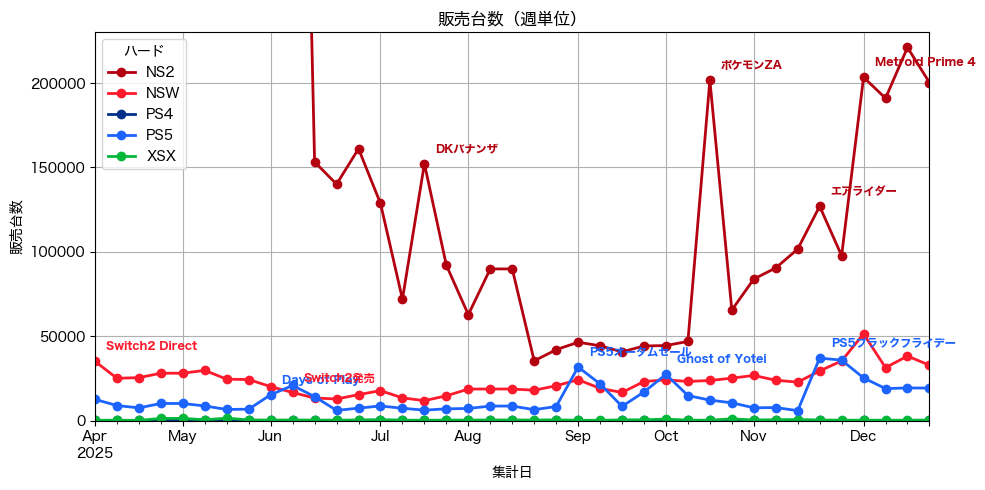

In [5]:
(fig, df) = ph.plot_sales(begin=gu.report_begin(report_date), end=report_date, ymax=230000, event_mask=he.EVENT_MASK_MIDDLE)

## 月間販売推移

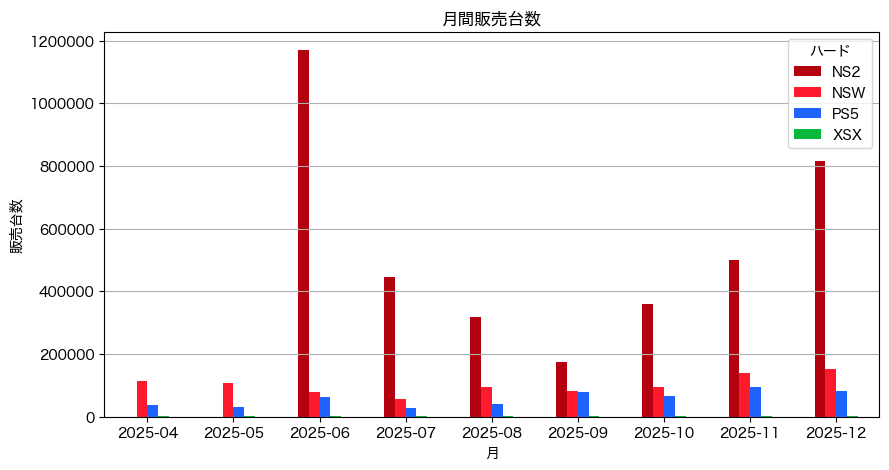

In [6]:
(fig, df) = ph.plot_monthly_bar_by_hard(hw=["NS2", "PS5", "NSW", "XSX"], 
                                        begin=gu.report_begin(report_date), end=report_date,
                                        stacked=False)

12月のSwitch2は81万台に到達｡任天堂は2025Q3に167万台を販売しました｡

In [7]:
df = df.style.format({'NS2': '{:,.0f}', 'NSW': '{:,.0f}', 'PS5': '{:,.0f}', 'XSX': '{:,.0f}'})
display(df)

hw,NS2,NSW,PS5,XSX
year_month,,,,
2025-04,0,"113,513","38,983","1,710"
2025-05,0,"106,506","32,001","3,467"
2025-06,"1,169,684","78,097","63,516","1,400"
2025-07,"444,706","57,532","28,959","1,197"
2025-08,"319,690","94,517","39,004","1,599"
2025-09,"175,542","82,946","78,693","1,121"
2025-10,"358,399","96,080","64,732","2,253"
2025-11,"500,414","138,018","93,852","1,891"
2025-12,"815,632","153,619","82,691",895


### Nintendo Switchの月間販売台数： 2023,2024年との比較

12月の前年比は34%(予想33%)になりました｡
SwitchからSwitch2へのシフトは順調で､2026年は前年比50%を切るのが普通になるでしょう｡

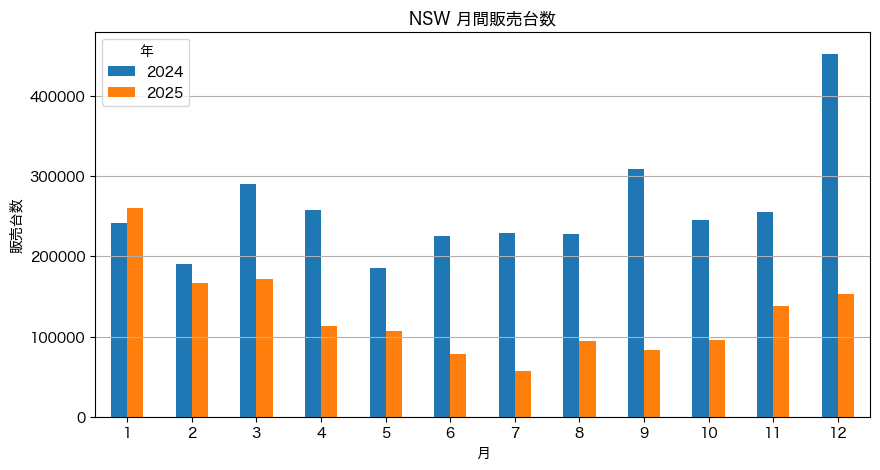

In [8]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="NSW", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [11]:
this_year = report_date.year
df = df.drop(columns=[2024])
df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
df.style.format({'YoY': '{:.1%}'})

KeyError: '[2024] not found in axis'

### PlayStation 5の月間販売台数： 2023, 2024年との比較

PS5の2025年12月は予想通り8万2千台にとどまりました｡前年比51%なのでほぼ半減です｡


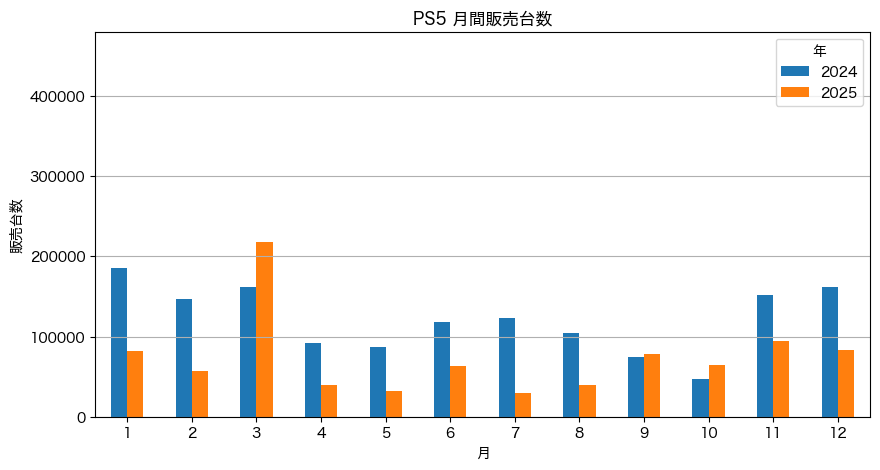

In [12]:
(fig, df) = ph.plot_monthly_bar_by_year(hw="PS5", ymax=480000, begin=gu.years_ago(report_date), end=report_date)

In [64]:
this_year = report_date.year
df = df.drop(columns=[2023])
df.loc[:, "YoY"] = df.loc[:,this_year] / df.loc[:, this_year - 1]
df.style.format({'YoY': '{:.1%}'})

year,2024,2025,YoY
month,,,
1,185480,81587,44.0%
2,146945,56886,38.7%
3,162281,218300,134.5%
4,91981,38983,42.4%
5,87218,32001,36.7%
6,117592,63516,54.0%
7,123087,28959,23.5%
8,104178,39004,37.4%
9,74523,78693,105.6%


## 累計販売推移



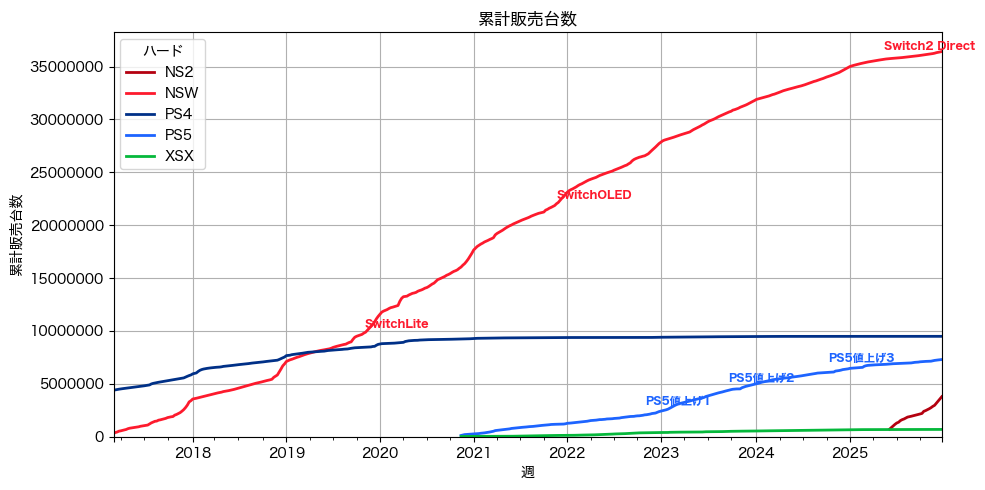

In [13]:
long_range_event_mask = he.EventMasks(hard=0.5, soft=0, event=0, price=0, sale=0)
(fig, df) = ph.plot_cumulative_sales(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], begin=datetime(2017,3,1), event_mask = he.EVENT_MASK_LONG)

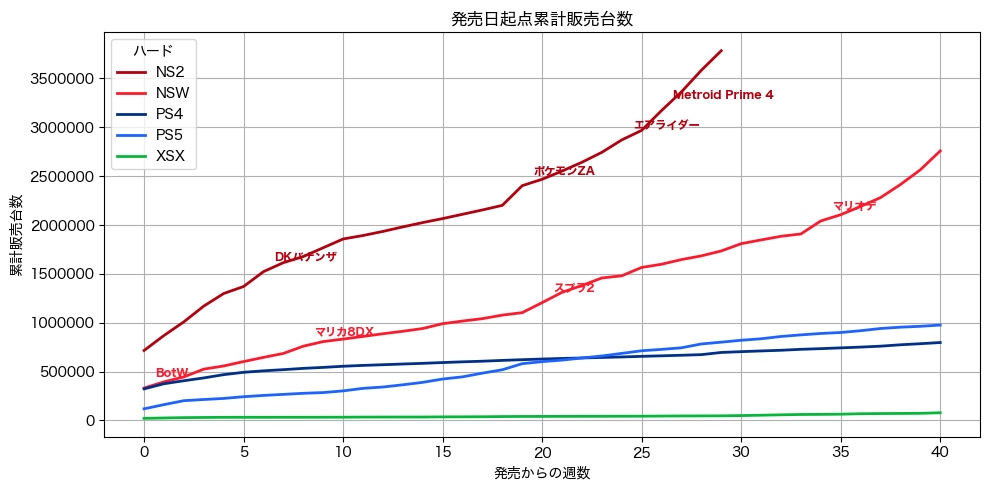

In [66]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=['PS4', 'NS2', 'PS5', 'NSW', 'XSX'], end=40, event_mask=he.EVENT_MASK_MIDDLE)

### Switch2/PS5差分

現時点でSwitch2の累計378万台､PS5の累計は729万台です｡Switch2とPS5の差は351万台｡
30週間で､PS5に追いつく道筋の半分を超えました｡


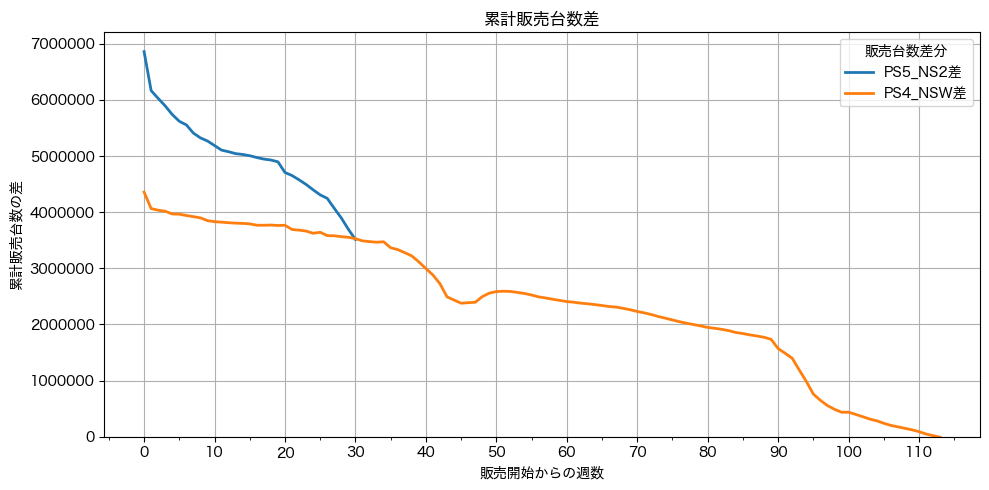

In [ ]:
(fig4, d4) = ph.plot_cumsum_diffs(cmplist = [('NS2', 'PS5'), ('NSW', 'PS4')], xgrid=10)


In [67]:
# d4.head(35)

## Switch2初動状況

Switch2は今週も歴代初動1位の座をキープしています｡
早ければ次回集計で400万台に到達する可能性があります｡

同時期のWii, PS2と比べて100万台多く､
3DS, Switchと比べると200万台以上多く普及しています｡
驚異的な普及速度です｡

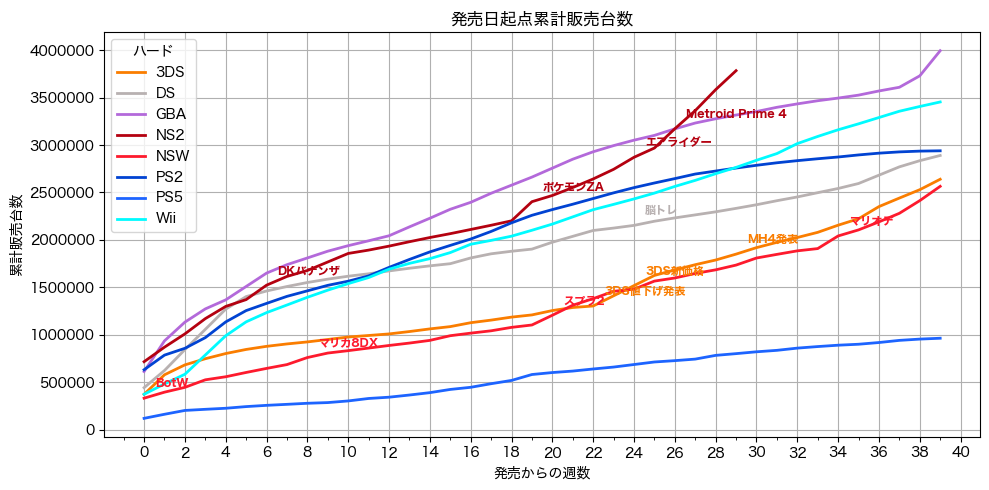

In [68]:
(fig, df) = ph.plot_cumulative_sales_by_delta(hw=["GBA", "NS2", "DS", "PS2", "Wii", "3DS", "NSW", "PS5"], 
                                        mode="week", xgrid=2, end=39,
                                        event_mask=he.EVENT_MASK_MIDDLE)

In [70]:
df12 = df.iloc[df.index == 29]
# df12をunpivotして、列名を"ハード"、"販売数"にする
df12_unpivot = df12.unstack().reset_index()
df12_unpivot.columns = ['ハード', '週数', '販売数']
df12_unpivot.sort_values(by='販売数', ascending=False, inplace=True)
df12_unpivot.set_index('ハード', inplace=True)
display(df12_unpivot.style.format({'販売数': '{:,.0f}'}))

,週数,販売数
ハード,,
NS2,29,"3,784,067"
GBA,29,"3,316,352"
Wii,29,"2,764,123"
PS2,29,"2,757,379"
DS,29,"2,332,198"
3DS,29,"1,849,714"
NSW,29,"1,734,083"
PS5,29,"800,380"


まず､12月同士の比較では18万台差でSwitchがSwitch2を上回っています｡
ただし2017年12月は5回集計､2025年12月は4回集計なので差が出ます｡
そこで11月まで含めて9週間で比較すると...
それでもSwitchの方が5万台多い結果となります｡

というわけで､日本でも「Switch2の年末商戦はSwitchのそれを下回った」は事実です｡
しかし､その差は僅かであり､Switch2の夏季中の出荷の多さを考えると､
Switch2は需要の強さを鑑みて年末集中よりは､
早くから太めの出荷を行ったと見るべきでしょう｡

前記のように30週間での初動台数はSwitchの倍以上のペースであり､
需要の強さは圧倒的と言えます｡

## 年単位の状況

2025年の販売台数は621万台でした｡
2022年の626万台にはギリ届来ませんでしたが､2018,2019年を超える事ができました｡


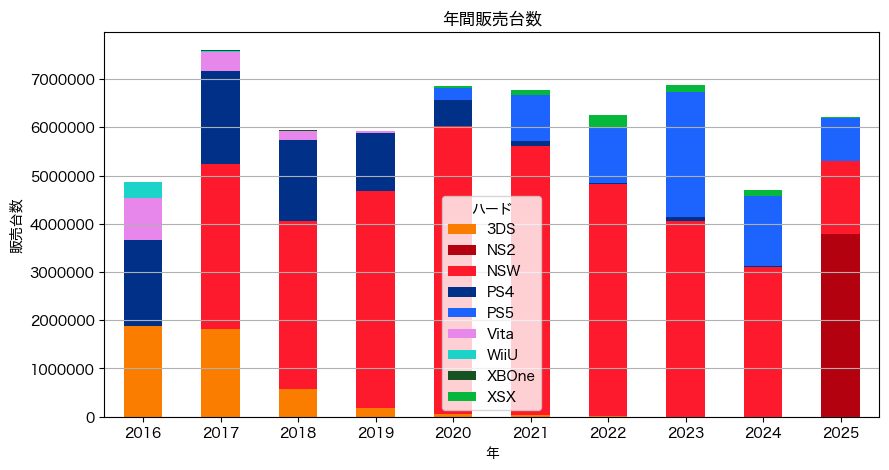

In [14]:
(fig, df) = ph.plot_yearly_bar_by_hard(hw=['PS4', 'PS5', 'NSW', 'NS2', '3DS', 'WiiU', 'Vita', 'XSX', 'XBOne'], 
                                       begin=gu.years_ago(report_date, 10),
                                       end=report_date, stacked=True)

In [15]:
df["sum"] = df.sum(axis=1)
df

hw,3DS,NS2,NSW,PS4,PS5,Vita,WiiU,XBOne,XSX,sum
year,,,,,,,,,,
2016,1874457.0,0.0,0.0,1790883.0,0.0,865002.0,336151.0,8897.0,0.0,4875390.0
2017,1827131.0,0.0,3407158.0,1935247.0,0.0,396207.0,21817.0,14664.0,0.0,7602224.0
2018,566420.0,0.0,3482388.0,1695227.0,0.0,181728.0,0.0,15339.0,0.0,5941102.0
2019,191173.0,0.0,4493903.0,1196153.0,0.0,37668.0,0.0,8315.0,0.0,5927212.0
2020,62761.0,0.0,5956943.0,542647.0,255150.0,0.0,0.0,3585.0,31424.0,6852510.0
2021,28540.0,0.0,5579127.0,104054.0,968185.0,0.0,0.0,0.0,97234.0,6777140.0
2022,10664.0,0.0,4804546.0,22823.0,1154054.0,0.0,0.0,0.0,269737.0,6261824.0
2023,3033.0,0.0,4062609.0,73292.0,2587468.0,0.0,0.0,0.0,141712.0,6868114.0
2024,162.0,0.0,3109103.0,13728.0,1454149.0,0.0,0.0,0.0,118221.0,4695363.0


### 年単位のメーカーシェア

任天堂のシェアがさらに上昇し､85.3%で2025年は完了しました｡


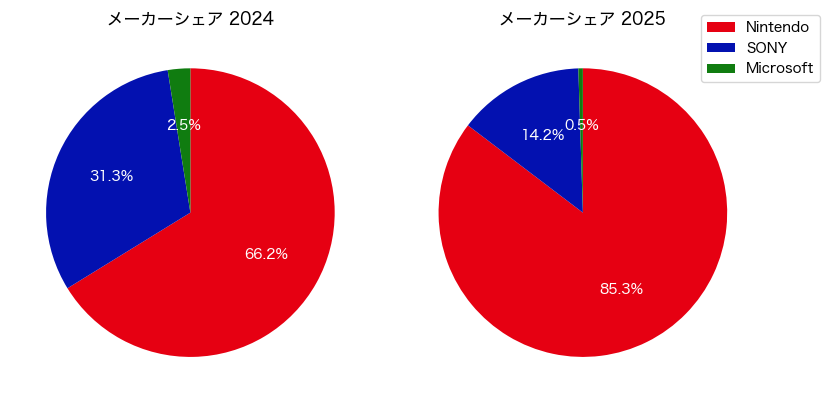

In [17]:
(fig, df) = ph.plot_maker_share_pie(begin_year=gu.years_ago(report_date, 2).year, end_year=report_date.year)